# Euler method for solving first-order differential equations

The Euler method is a numerical algorithm for solving ordinary differential equations given an initial value.

Given an initial value, the method works by evaluating the function $f(x)$ at a point $x = x_{n+1}$ using straight line approximation with slope $f'(x)$ at $x = x_n$, where the step, $h =  x_{n+1} - x_n$.

Using the first principle of derivatives,
$$f'(x_0) = \lim_{h \rightarrow 0}  \frac{f(x_0 + h) - f(x_0)}{h}$$
Therfore, if $h$ is small enough,
$$\implies f(x_0 + h) = f(x_0) + h \cdot f'(x_0)$$


Another possible explanation of this approximation, can originate from the Taylor expansion,
$$f(x_0 + h) = f(x_0) + h \cdot f'(x_0) + h^2 \cdot f''(x_0) + h^3 \cdot f'''(x_0) + \dots$$

Since $h << 1$, ignoring the higher order terms the approximation becomes,
$$f(x_0 + h) = f(x_0) + h \cdot f'(x_0)$$

Then the function $f(x)$ at a generic point $x_n$ can be approximated using,
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1})$$

The intial value of $f(x)$ at $x = x_0$ must be provided, which will be the starting point for the Euler method algorithm. This will eliminate the constant we would have got from solving the first-order differential equation.

An Illustration of the Euler method is given below,

![resources/euler-1.png](resources/euler-1.png)

## Code

In [1]:
from numpy import cos, empty, exp, pi, sin
from matplotlib import pyplot as plt

# Default configuaration for matplotlib
plt.style.use(['science', 'ieee'])
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
# Function to generate `n` evenly spaced points between limits `a` and `b`
def generate_points(a, b, h):

    # Calculating the number of points
    n = int(((b - a) / h) + 1)

    # Creating an empty array to store the points
    points = empty(n)

    # Generating the points
    for i in range(n):
        points[i] = a
        a += h

    return points


In [3]:
def solve_euler(y_prime, x_i, x_f, y_i, h):

    # Generating equispaced points
    x = generate_points(x_i, x_f, h)

    # Creating a array to store `y`
    y = empty(x.size)

    # Initialising `y` with initial value
    y[0] = y_i

    # Evaluating the function `y` at the remaining points
    for i in range(1, x.size):
        y[i] = y[i-1] + h * y_prime(x[i], y[i-1])

    return y


## Examples

### $$\frac{dy}{dx} = y$$
$$y = Ae^x$$

In [4]:
def y_prime(x, y):
    return y


x_i = 0
x_f = 5
y_i = 1
h = 0.1


In [5]:
points = generate_points(x_i, x_f, h)

y_euler = solve_euler(y_prime, x_i, x_f, y_i, h)
y_analytical = exp(points)


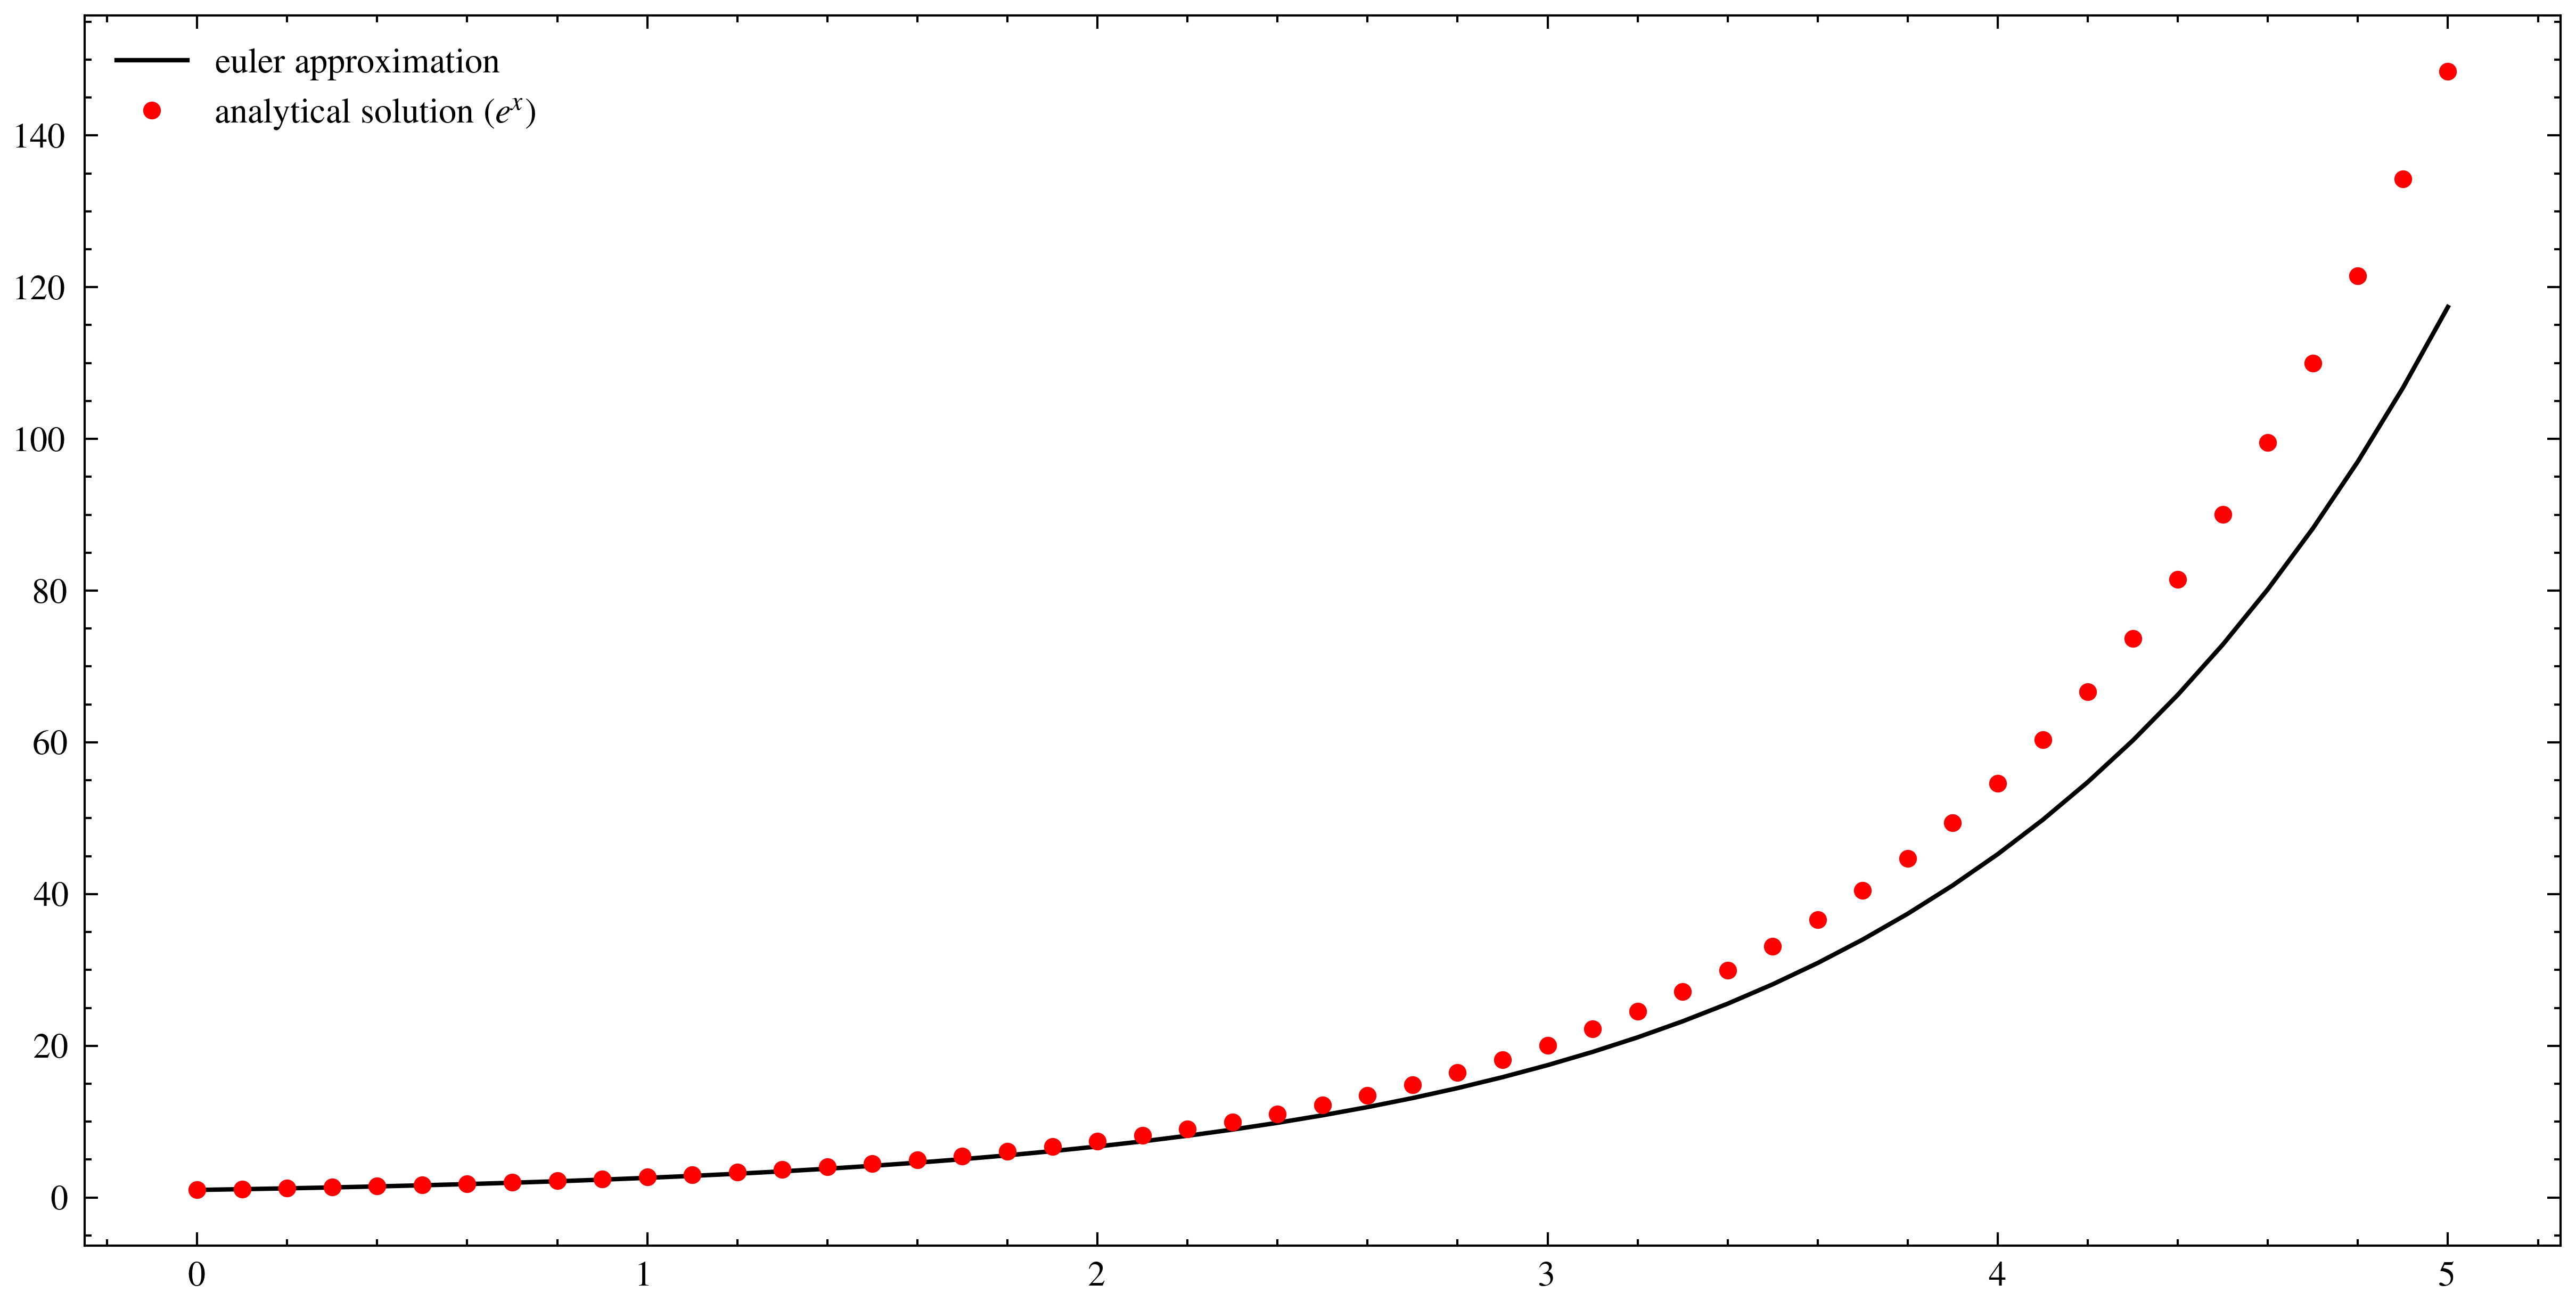

In [6]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_analytical, '.', label="analytical solution ($e^x$)")
plt.legend()
plt.show()


### $$\frac{dy}{dx} = sin(x)$$
$$y = -cos(x) + C$$

In [7]:
def y_prime(x, y):
    return sin(x)


x_i = 0
x_f = 2 * pi
y_i = - 1
h = 0.1


In [8]:
points = generate_points(x_i, x_f, h)

y_euler = solve_euler(y_prime, x_i, x_f, y_i, h)
y_analytical = -cos(points)


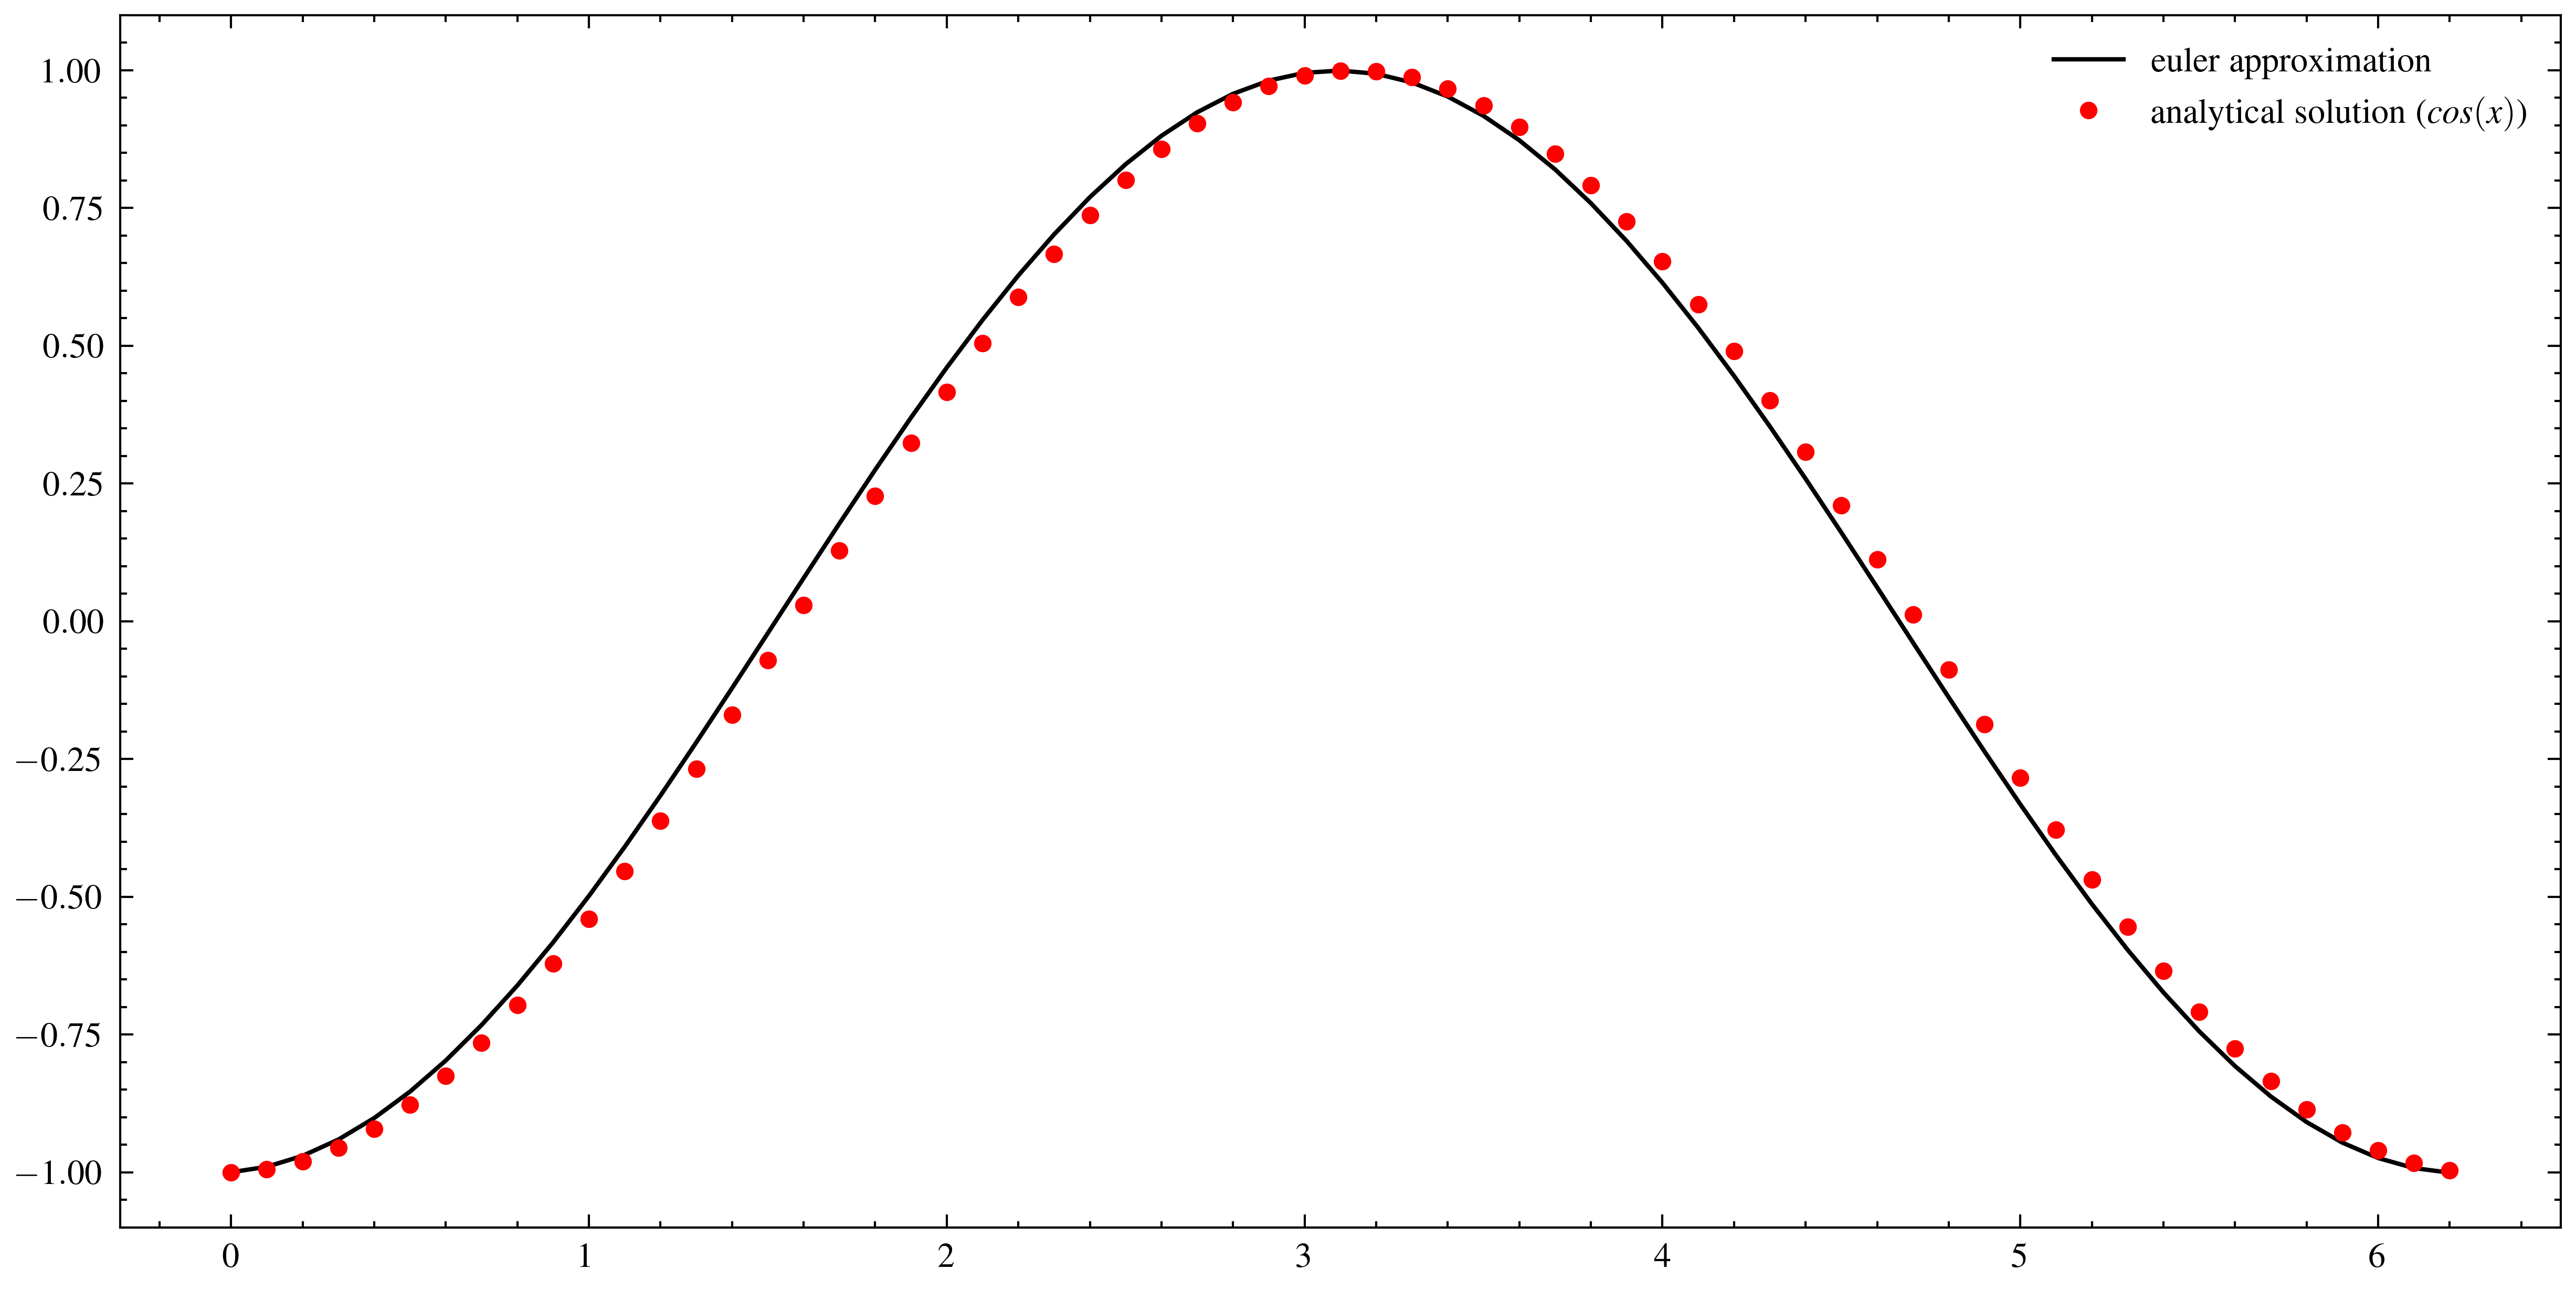

In [9]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_analytical, '.', label="analytical solution ($cos(x)$)")
plt.legend()
plt.show()
